<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/005_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

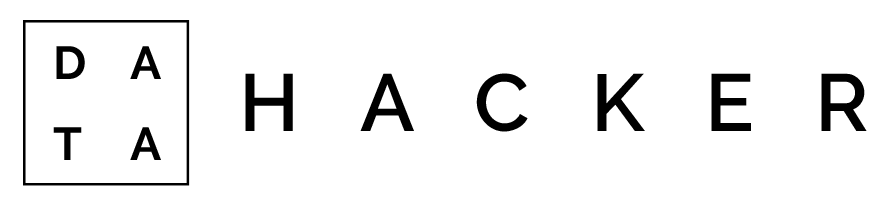
# Logistic regression using PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

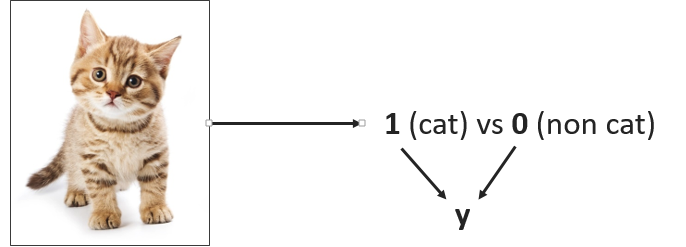

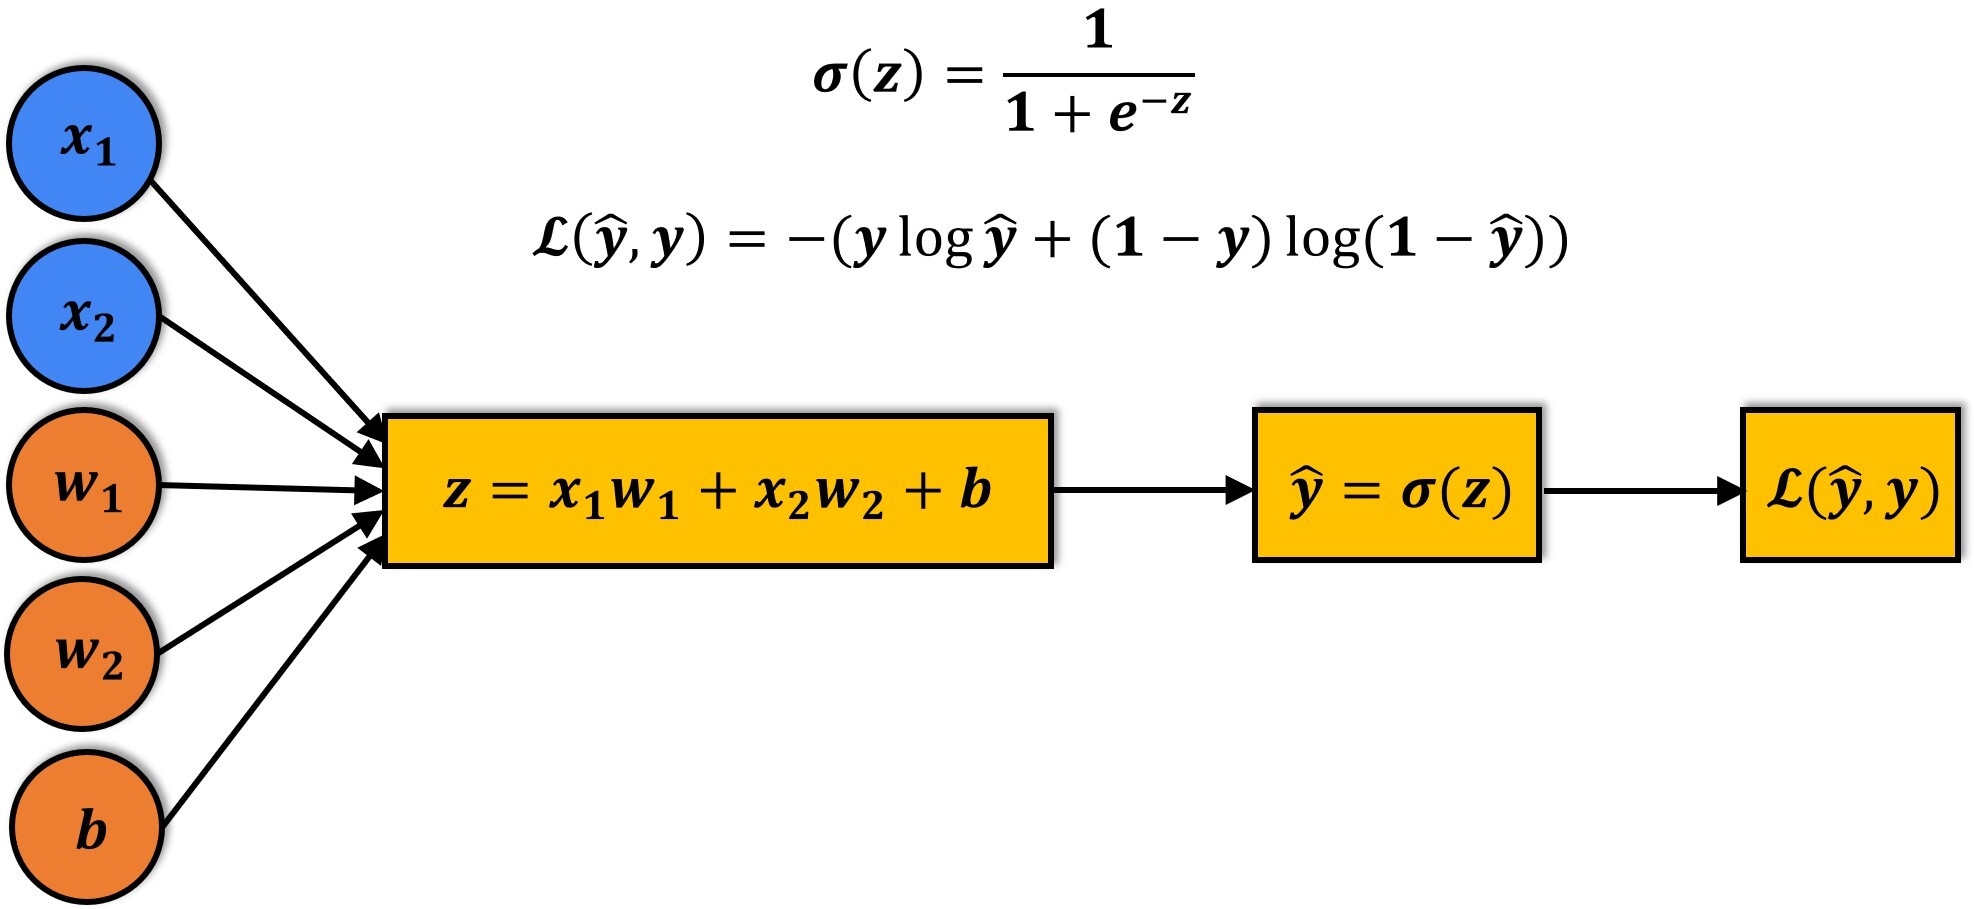

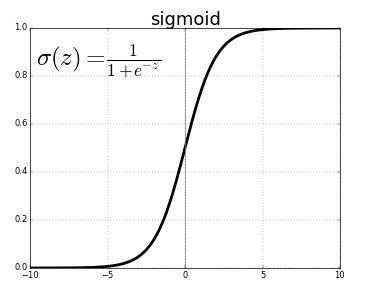

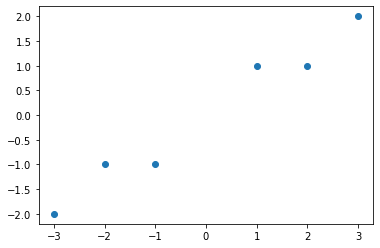

In [ ]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1, 1],[2,1],[3,2]])
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
x1 = np.linspace(-3, 3, 50)
x2 = -1 * x1 + 1

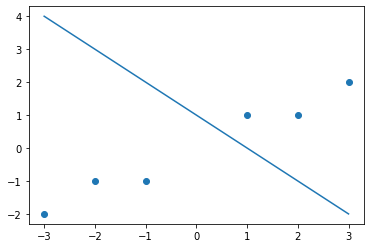

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(x1, x2)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
x, y = make_blobs(n_samples=[200, 200], cluster_std=1.4, random_state=2)

In [ ]:
x_torch = torch.from_numpy(x).type(torch.FloatTensor)
y_torch = torch.from_numpy(y).type(torch.FloatTensor).reshape(-1, 1)

In [ ]:
y_torch

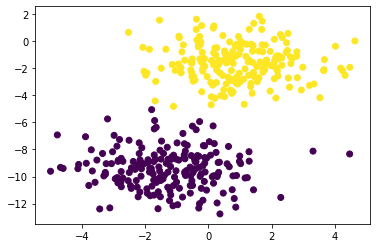

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(2, 1)
  
  def forward(self, x):
    y_hat = self.linear(x)
    return torch.sigmoid(y_hat)

In [ ]:
model = LogisticRegression()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

In [ ]:
all_loss =[]

for epoch in range(10000):
  y_hat = model(x_torch)

  loss = criterion(y_hat, y_torch)
  all_loss.append(loss.item())
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

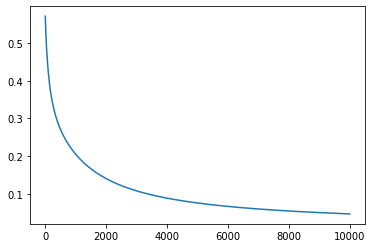

In [ ]:
plt.plot(all_loss)

In [ ]:
for name, parameter in model.named_parameters():
  print(name, parameter)

linear.weight Parameter containing:
tensor([[0.6412, 0.7574]], requires_grad=True)
linear.bias Parameter containing:
tensor([3.5931], requires_grad=True)


In [ ]:
y_pred = model.forward(x_torch)

In [ ]:
print(y_pred[:10])

tensor([[0.0753],
        [0.7801],
        [0.9627],
        [0.0115],
        [0.0072],
        [0.1103],
        [0.0098],
        [0.0057],
        [0.9676],
        [0.9506]], grad_fn=<SliceBackward>)


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
print(y_pred[:10])

[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


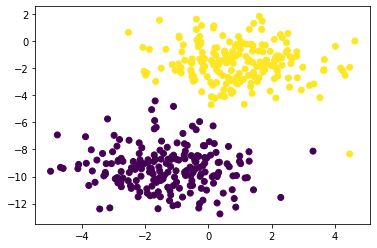

In [ ]:
plt.scatter(x_torch[:, 0], x_torch[:, 1], c=y_pred)